# ブラックボックスと関数 
1, 関数はブラックボックス（処理の中身がわかってない）のままで使うことができる  
2. 何を入力したら何が出力されるかだけわかっていればよい

# import は関数群を使うという宣言  
---

例  :  
import pandas　DataFrameを扱うための関数  
import seaborn グラフを描くための関数

---

- **しかし、どこにもdef pandas(): のような記述がない！**
- **importはブラックボックス化した関数**

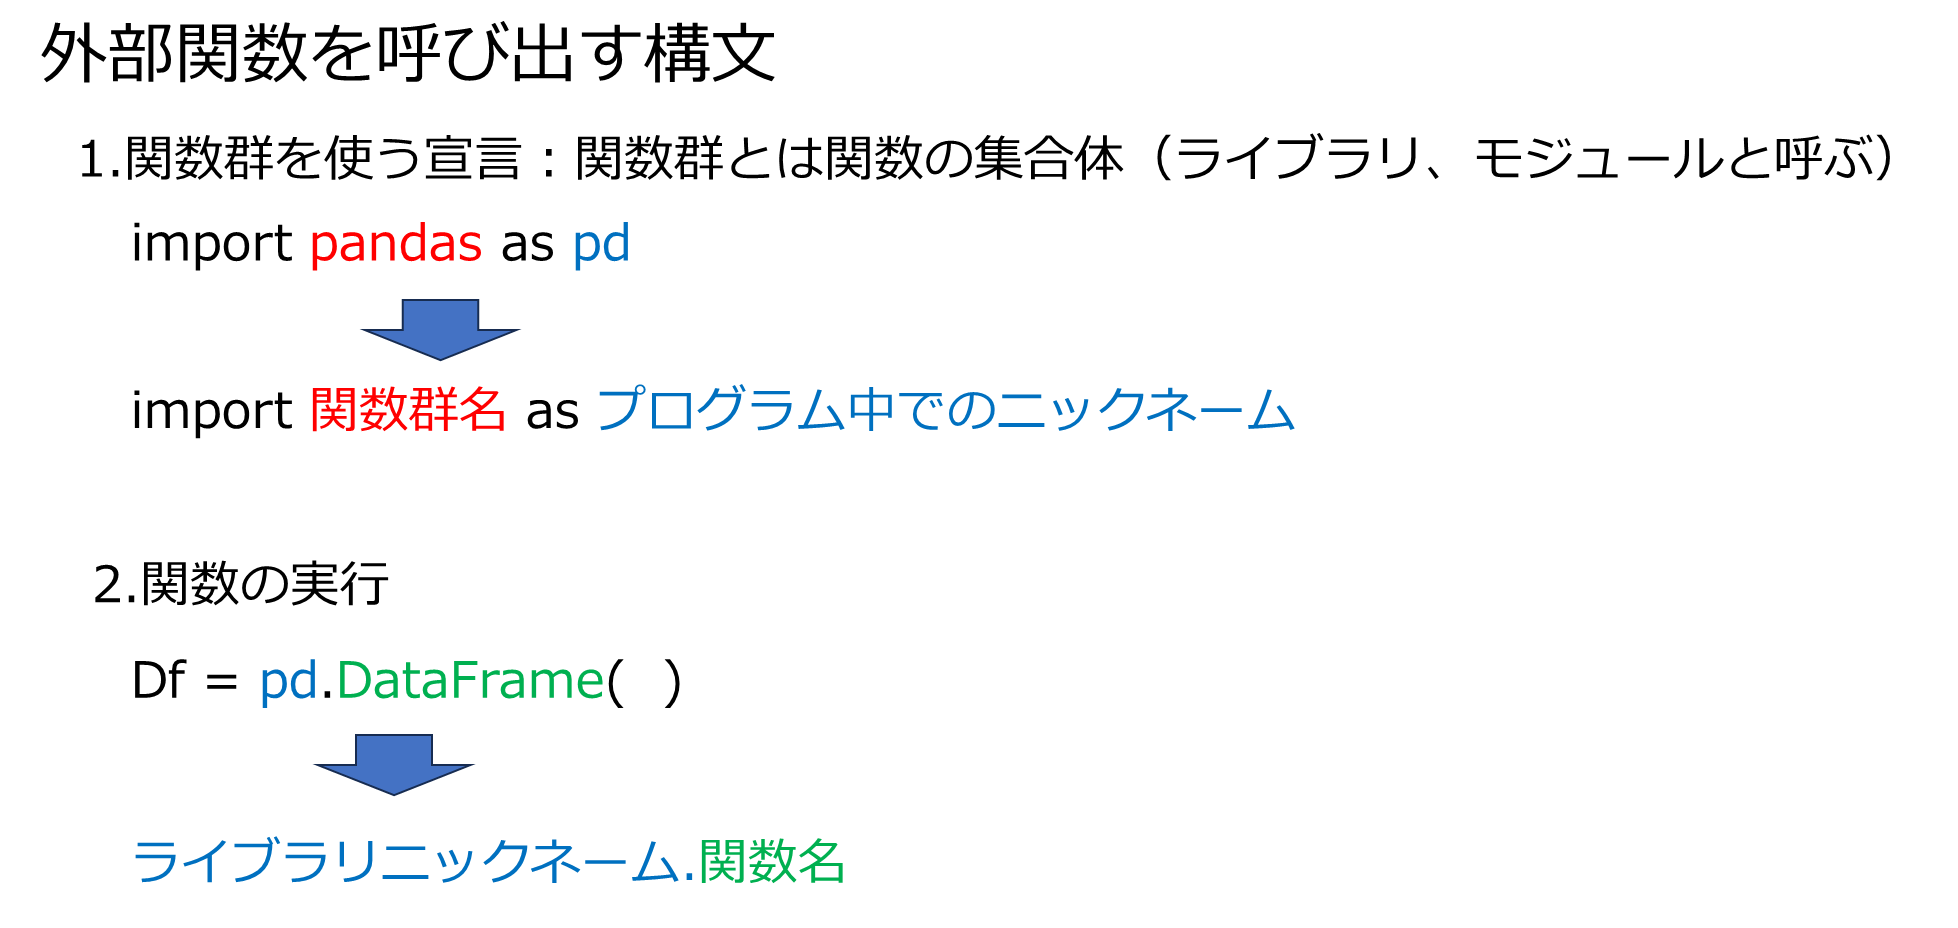

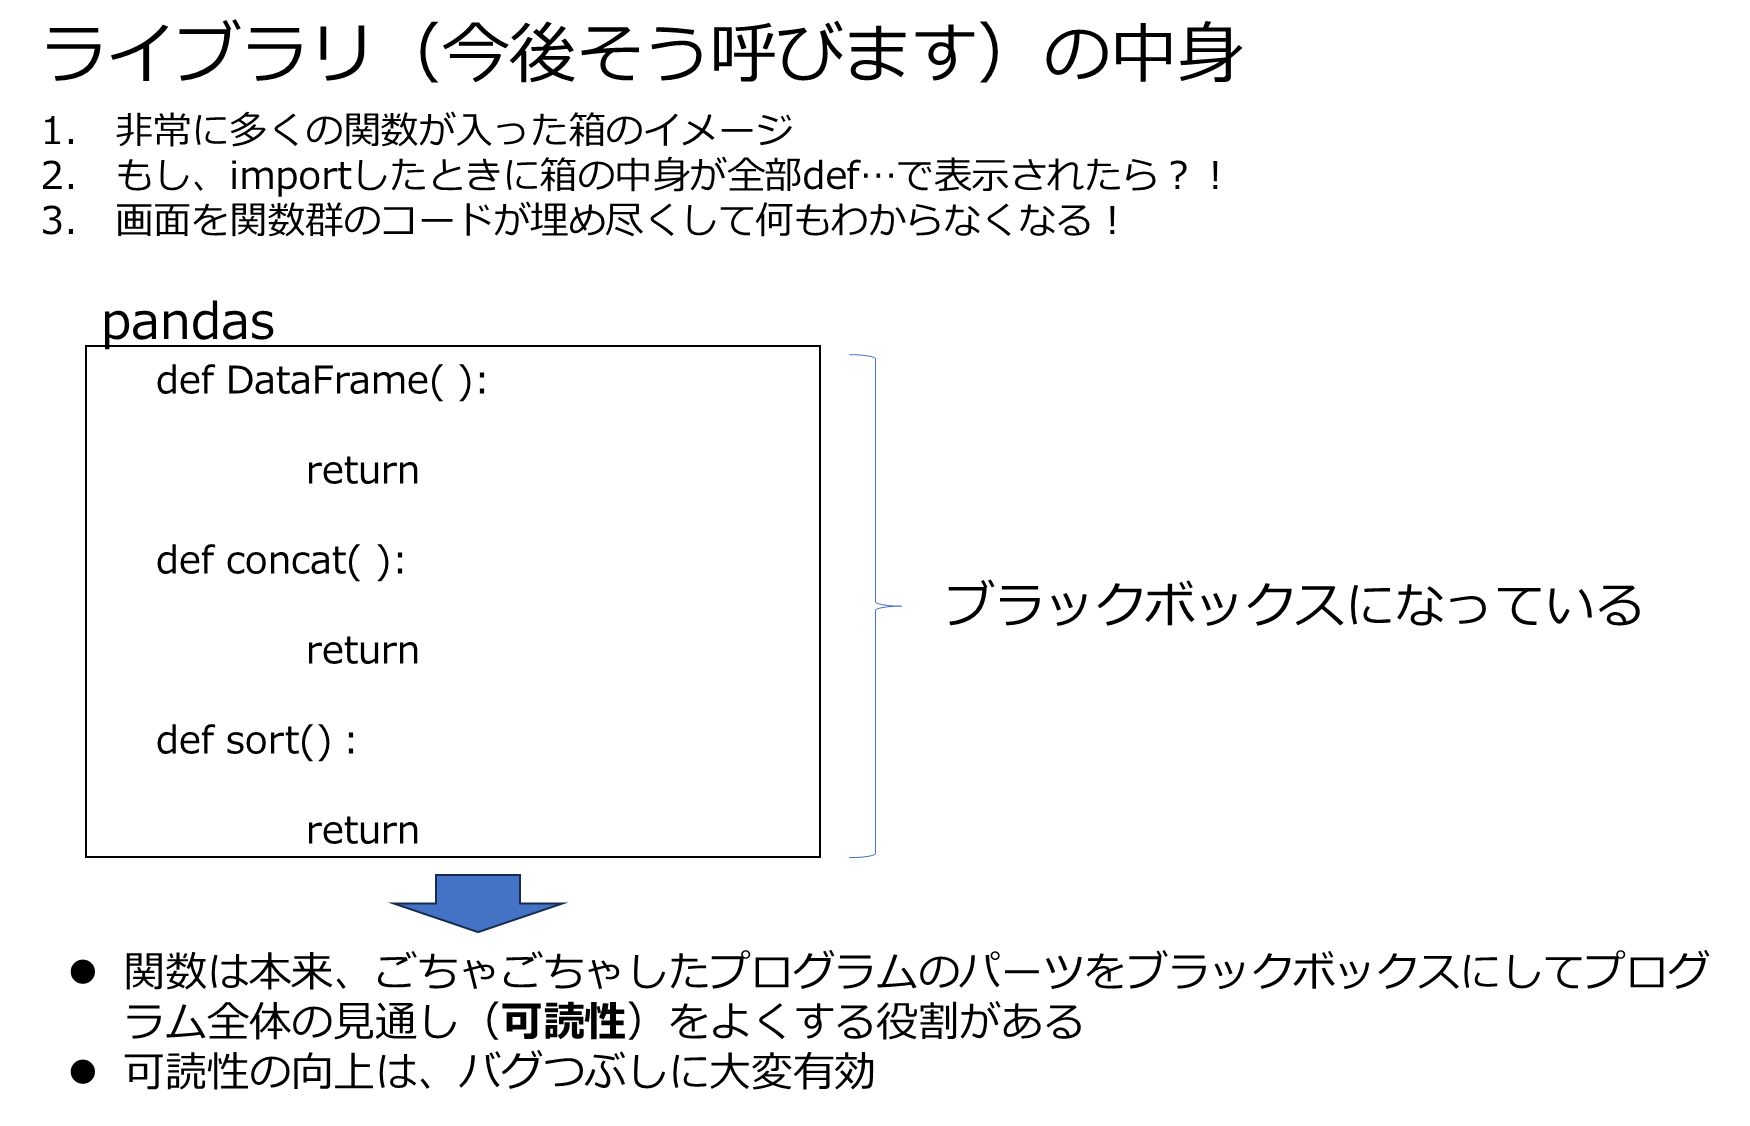

# ブラックボックス化と可読性の例
1.  文書から単語を自動認識するライブラリJanome
2.  以下のコードからパターンを読み取ってみてください
    - すもも。。の文章を変えてみる
    - surface, part_of_speechは何だろうか
## 1. 文章を単語分割する

In [ ]:
!pip install janome

In [10]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
words = t.tokenize('すもももももももものうち')
for w in words:
    print(w.surface,':', w.part_of_speech)


すもも : 名詞,一般,*,*
も : 助詞,係助詞,*,*
もも : 名詞,一般,*,*
も : 助詞,係助詞,*,*
もも : 名詞,一般,*,*
の : 助詞,連体化,*,*
うち : 名詞,非自立,副詞可能,*


## 2. 名詞だけ取り出す

In [7]:
from janome.tokenizer import Tokenizer

t = Tokenizer()
words = t.tokenize('すもももももももものうち')
nouns= []
for w in words:
    hinshi = w.part_of_speech.split(',')
    if hinshi[0] == '名詞' :
        nouns.append(w.surface)
print(nouns)



['すもも', 'もも', 'もも', 'うち']


## 3. 徐々に機能を増やすとプログラムが複雑になる
**1. csvから読み込んだfortravel口コミを口コミ毎（行毎）に単語（名詞のみ）に分割する(全部で50行。fortravel.csvを開けてみると詳しいことがわかる）***  
**2. 分割した単語をリスト型の要素にして、そのリスト型をリスト型に追加する（つまり、口コミの単語リストを要素とする2次元配列リスト型）**  
**3. all_reviews に結果が格納されるはずだが、実行すると空のまま どこのバグがあるかわかるだろうか**


In [17]:
from janome.tokenizer import Tokenizer
import pandas as pd
fortravel_df = pd.read_csv("fortravel.csv", encoding='ms932', sep=',')
print(fortravel_df.iloc[:10,:])
print(len(fortravel_df))
      

                  title                                               body  \
0              いいロケーション  日本酒の品揃えが素晴らしいです。特に県外産のもののレベルの高さは秀逸です。料理は凝っているか...   
1                    温泉  出張で利用しました。秋田駅からは少しはなれていますが、飲み屋街のそばで飲食店には困らない立地...   
2       上級ビジネスホテルといった感じ  周囲のビジネスホテルに比べ千円以上高いがそれに見合う高級感がある。ロビーに無料で使用できるパ...   
3    手ごろな価格で清潔・安心なホテルです  リッチモンドホテルならではの清潔できれいな客室が、早期予約で手ごろな価格で止まることができま...   
4            駅から近くすぐ分かる  一人旅の素泊まり3700円にて一泊しました。駅から目に入りやすい、すぐ確認できる場所だったの...   
5            美しい森林地帯を行く  秋田県の内陸部、鷹ノ巣と角館を結ぶ山間の路線です。とくに国鉄阿仁合線だった区間は、駅舎や構内...   
6  駅弁の域は出ていないかなあと思いました。  ここは鶏めし弁当＠850円が超人気商品。駅弁なんですが、圧倒的な支持を受けていて、ネットでも...   
7               ザ・秘湯の御宿  豪雪の日に宿泊しました。雪見の露天風呂は最高です。自然の中にいくつか露天があり、夜の時間帯は...   
8              地産の野菜が安い  すべての建造物・テーブル・椅子が木でつくられており、木のぬくもりが感じられる施設です。この辺...   
9             なまはげがいっぱい  館内は、なまはげでいっぱいです。なまはげ伝承ホールでは、大晦日の男鹿のなまはげ行事を15分間...   

          date  
0  2016-06-01   
1  2012-02-01   
2  2011-08-01   
3  2014-04-01   
4  2014-03-01   
5  2015-10-01   
6  2013-10-01   
7  20

In [36]:
from janome.tokenizer import Tokenizer
import pandas as pd

t = Tokenizer()

fortravel_df = pd.read_csv("fortravel.csv", encoding='ms932', sep=',')
review_all = []
for k, row in fortravel_df.iterrows():
    review = row['body']
    words= t.tokenize(review)
    nouns= []
    for w in words:
        hinshi = w.part_of_speech.split(',')
        if hinshi[0] == '名詞' :
            nouns.append(w.surface)
    nouns.append(nouns)

print(review_all)



[]


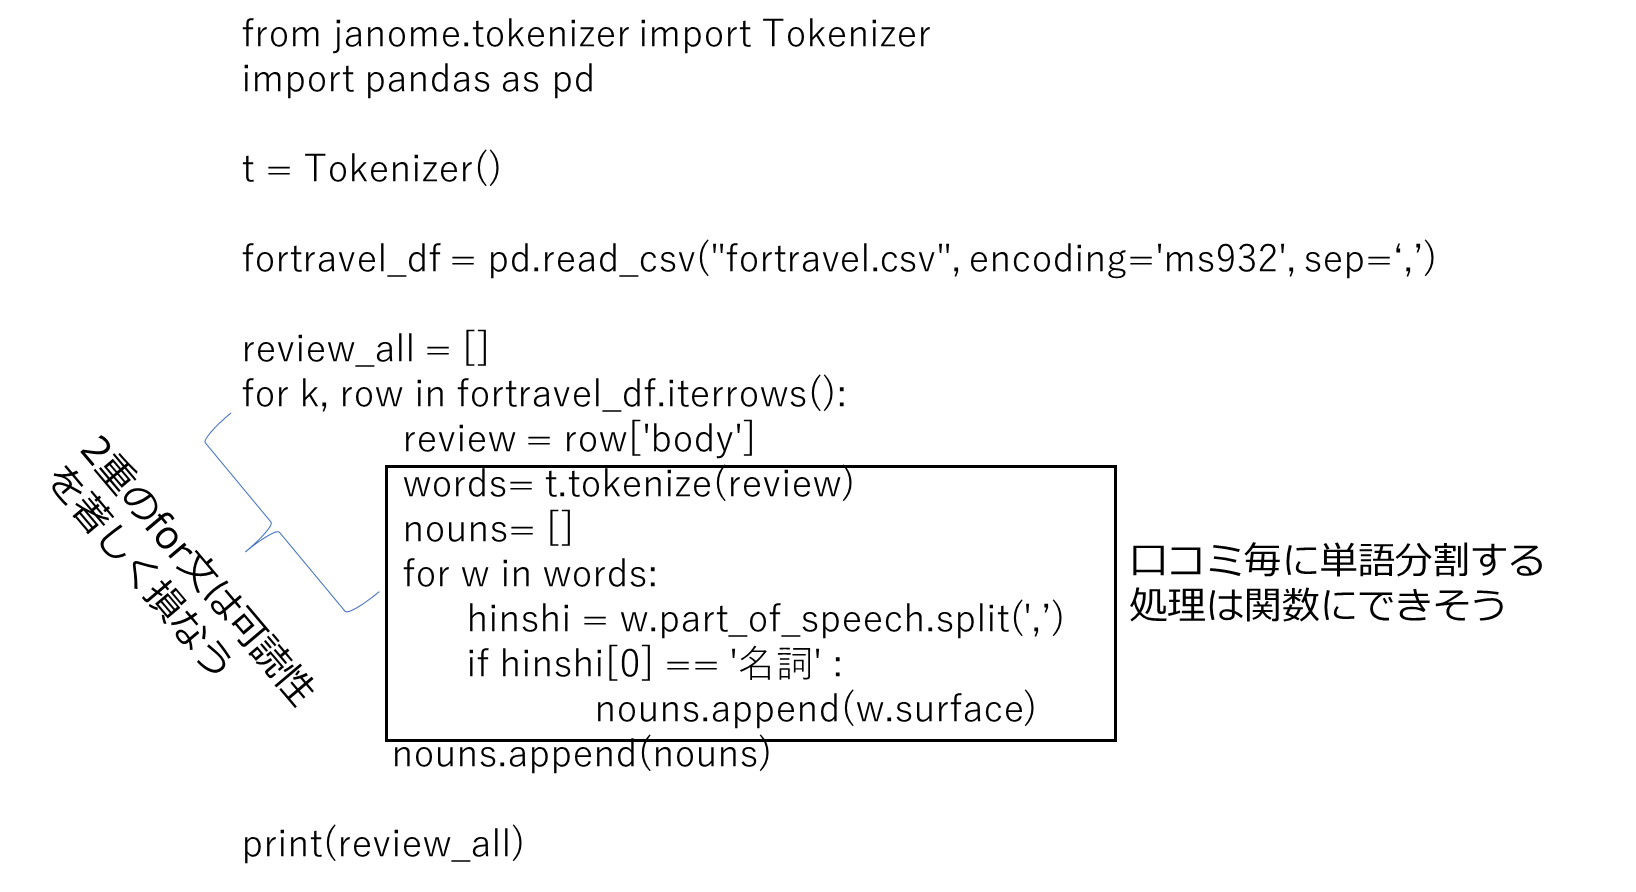

**1. split_words : 口コミを1行渡すと名詞の単語列をリスト型にして返す関数**  
**2. これで2重のfor文が解消して、可読性が向上している**  
**3. split_wordsは、上記2.のコーディングそのままなので、バグはあるはずがない**
**4. 修正箇所は、nouns.append -> review_all.append であることはすぐわかるようになっている（実際修正してみてください）**

In [40]:
from janome.tokenizer import Tokenizer
import pandas as pd

t = Tokenizer()
def split_words(text):
    words= t.tokenize(text)
    nouns= []
    for w in words:
        hinshi = w.part_of_speech.split(',')
        if hinshi[0] == '名詞' :
            nouns.append(w.surface)
    return nouns

fortravel_df = pd.read_csv("fortravel.csv", encoding='ms932', sep=',')
review_all = []
for k, row in fortravel_df.iterrows():
    review = row['body']
    nouns = split_words(review)
    nouns.append(nouns)

print(review_all)


[]


## 4. 関数 split_words をブラックボックスにする
**1. 入力：テキスト文書　出力：単語のリスト　さえ分かっていれば中身を知る必要がない。また、このプログラム以外でも使いまわせる**  
**2. import pandas のようにブラックボックス化して、いろいろなプログラムでimportできるようにしたい**
### Jupyterでは、自前の関数をブラックボックス化して汎用化する(importできるようにする）ことはできない。
**以下のプログラムは、Jupiterではない。split_wordsのブラックボックス化を実現できる！（デモを見てください）**

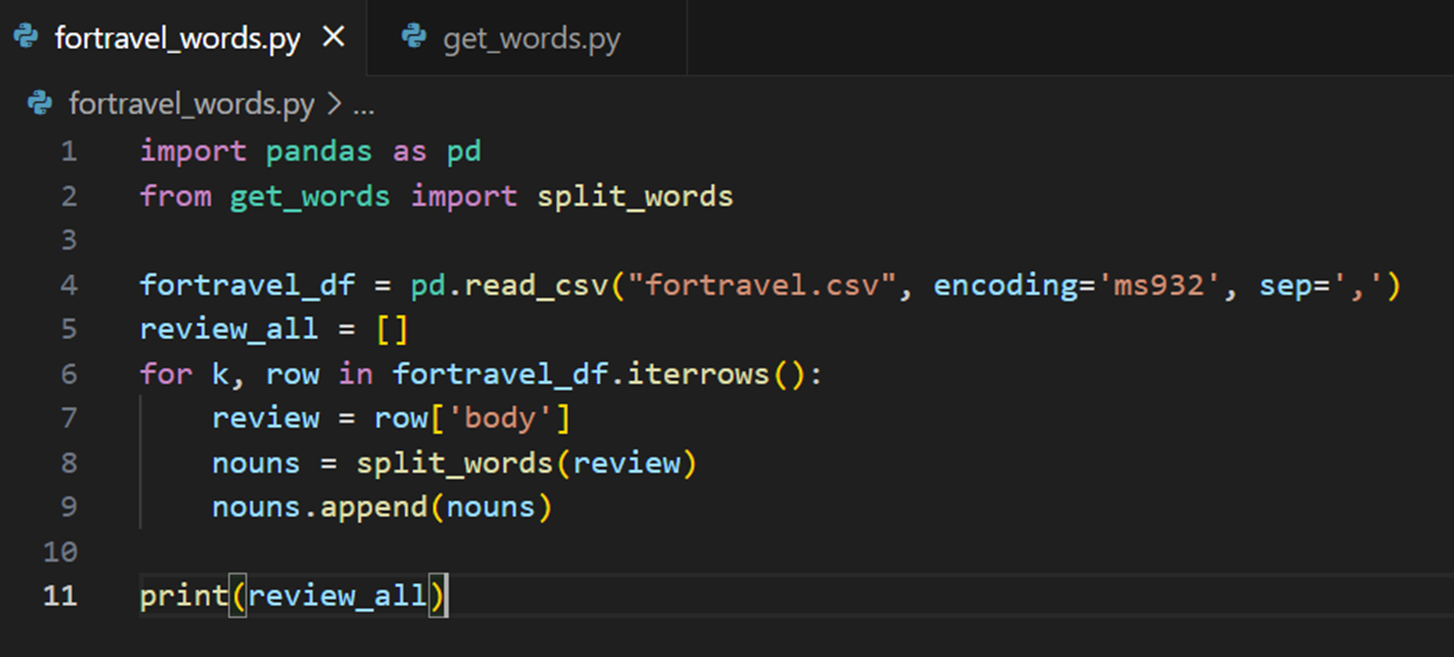

### 1. 自前関数を作るには、テキストエディタというツールでプログラムを書く必要がある
### 2. テキストエディタを使うにはpythonをPCにインストールする必要がある
### 3. 複雑で長い実用的プログラムは、テキストエディタで書くことが一般的（Jupyterはどちらかというと教育用）
# 次回、pythonのインストール、テキストエディタによるプログラム制作の方法を説明します。